In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

#USO DEL CORPUS

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sns.set(style='whitegrid')
stop_words = set(stopwords.words('english'))

#CARGA DE DATOS

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Aplicaciones de data science /train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Aplicaciones de data science /test.csv')

In [ ]:
train_data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
test_data.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


#INSPECCIÓN DE LOS DATOS

In [ ]:
print("Train data size : {}".format(train_data.shape))
print("Test data size : {}".format(test_data.shape))

Train data size : (27481, 4)
Test data size : (3534, 3)


####VERIFICAR EL TIPO DE DATO

In [ ]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


#ANÁLISIS EXPLORATORIO DE DATA (EDA)
###ENCONTRAR VALORES NULOS

In [ ]:
pd.DataFrame(train_data.isnull().sum(), columns=['Valores nulos por columna'])

,Valores nulos por columna
textID,0
text,1
selected_text,1
sentiment,0


In [ ]:
pd.DataFrame(test_data.isnull().sum(), columns=['Valores nulos por columna'])

,Valores nulos por columna
textID,0
text,0
sentiment,0


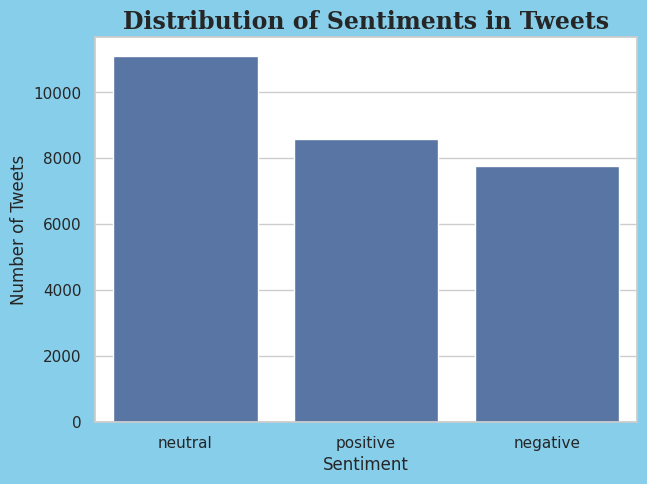

In [ ]:
sentiment_counts = train_data['sentiment'].value_counts()
plt.figure(figsize=(7, 5), facecolor='skyblue')
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.title("Distribution of Sentiments in Tweets", fontweight= "bold", fontfamily='serif', fontsize =17)
plt.show()


NÚMERO DE ALFABETOS POR ORACIÓN

In [ ]:
def get_length_alphabets(text):
    text = str(text)
    return len(text)

NÚMERO DE PALABRAS POR ORACIÓN

In [ ]:
def get_length_words(text):
    text = str(text)
    return len(text.split(' '))

In [ ]:
train_data['length_alphabets'] = train_data['text'].apply(lambda x: get_length_alphabets(x))
train_data['length_words'] = train_data['text'].apply(lambda x: get_length_words(x))
train_data.head()

,textID,text,selected_text,sentiment,length_alphabets,length_words
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36,8
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46,11
2,088c60f138,my boss is bullying me...,bullying me,negative,25,5
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31,6
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75,15


In [ ]:
train_data.describe()

,length_alphabets,length_words
count,27481.000000,27481.000000
mean,68.327645,13.779448
std,35.605403,7.169974
min,3.000000,1.000000
25%,39.000000,8.000000
50%,64.000000,13.000000
75%,97.000000,19.000000
max,141.000000,101.000000


In [ ]:
train_data['text_len'] = train_data['text'].str.len()
train_data['selected_len'] = train_data['selected_text'].str.len()

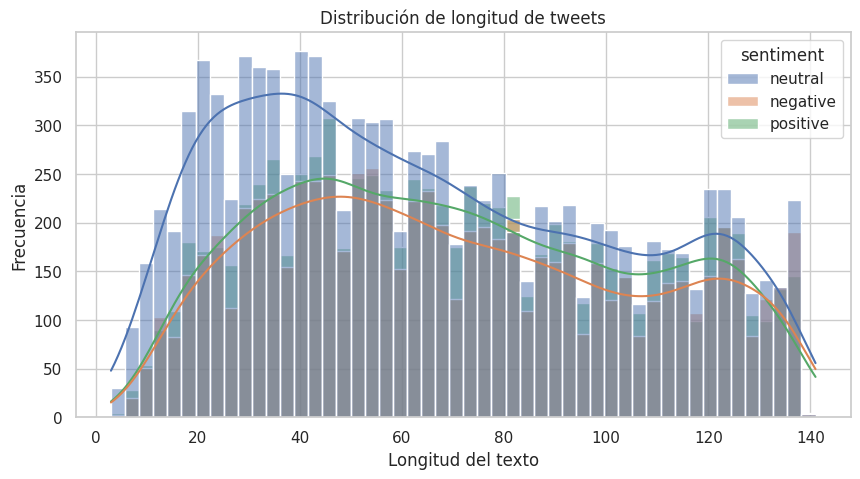

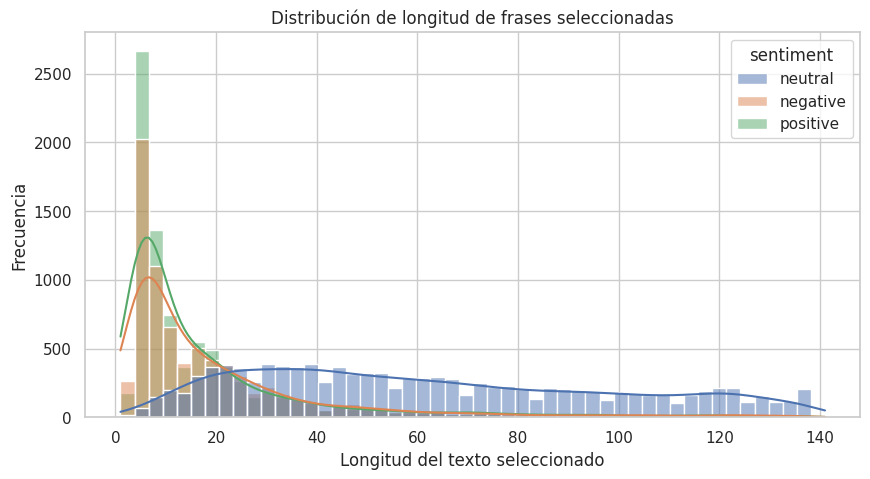

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train_data, x='text_len', hue='sentiment', bins=50, kde=True)
plt.title('Distribución de longitud de tweets')
plt.xlabel('Longitud del texto') # Added x-axis label
plt.ylabel('Frecuencia') # Added y-axis label
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=train_data, x='selected_len', hue='sentiment', bins=50, kde=True)
plt.title('Distribución de longitud de frases seleccionadas')
plt.xlabel('Longitud del texto seleccionado') # Added x-axis label
plt.ylabel('Frecuencia') # Added y-axis label
plt.show()


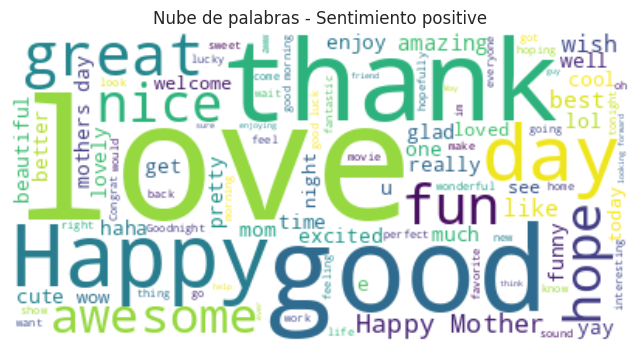

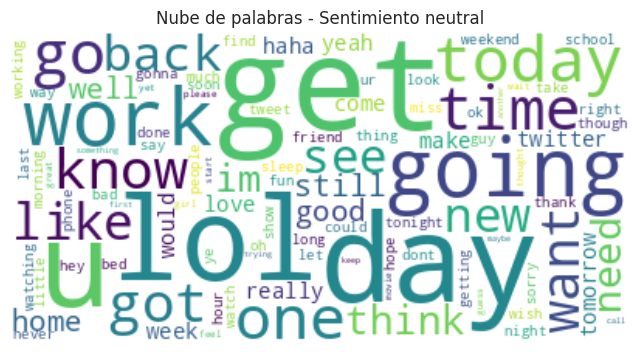

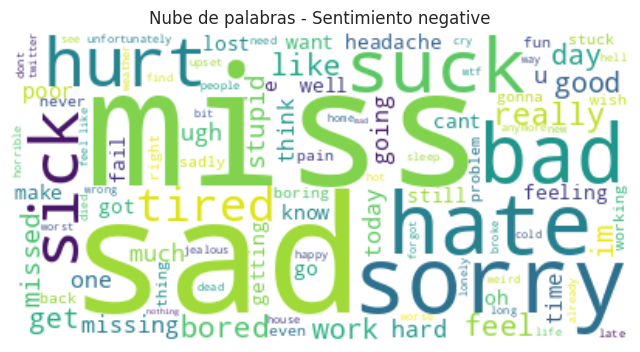

In [ ]:
def plot_wordcloud(sentiment):
    text = " ".join(train_data[train_data['sentiment'] == sentiment]['selected_text'].dropna().values)
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100).generate(text)

    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de palabras - Sentimiento {sentiment}')
    plt.show()

for sentiment in ['positive', 'neutral', 'negative']:
    plot_wordcloud(sentiment)

#PREPROCESAMIENTO DE DATA

Eliminacion de comillas y valores faltantes

In [ ]:
train_data['text'] = train_data['text'].str.strip('"')
train_data['selected_text'] = train_data['selected_text'].str.strip('"')

In [ ]:
columns_to_check = ['text', 'selected_text']
initial_rows = len(train_data)
data_cleaned = train_data.dropna(subset=columns_to_check)
rows_dropped = initial_rows - len(data_cleaned)

print(f"Filas eliminadas: {rows_dropped}")

Filas eliminadas: 1


Reemplazo de valores faltantes con la media o moda

In [ ]:
columns_to_fill = ['text', 'selected_text']

for col in columns_to_fill:
    if pd.api.types.is_numeric_dtype(data_cleaned[col]):
        data_cleaned[col].fillna(data_cleaned[col].mean(), inplace=True)
    else:
        data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

<ipython-input-177-9ab76a923fcb>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)
<ipython-input-177-9ab76a923fcb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)


In [ ]:
print("Valores faltantes despues de reemplazo:")
print(data_cleaned.isna().sum())

Valores faltantes despues de reemplazo:
textID              0
text                0
selected_text       0
sentiment           0
length_alphabets    0
length_words        0
text_len            0
selected_len        0
dtype: int64


#LIMPIEZA DE DATOS

In [ ]:
train_df_before_drop_shape = train_data.shape
test_df_before_drop_shape = test_data.shape

train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

train_data.drop(['text_len','selected_len','length_alphabets','length_words'], axis=1, inplace=True)

train_df_drop_shape = train_data.shape
test_df_drop_shape = test_data.shape

print("Train dataset: {} => {}".format(train_df_before_drop_shape, train_df_drop_shape))
print("Test dataset: {} => {}".format(test_df_before_drop_shape, test_df_drop_shape))

Train dataset: (27480, 8) => (27480, 4)
Test dataset: (3534, 3) => (3534, 3)


In [ ]:
# Normalizar el texto (convertir a minúsculas y eliminar caracteres no alfanuméricos)
def limpiar_texto(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text
train_data['text'] = train_data['text'].apply(limpiar_texto)
train_data['selected_text'] = train_data['selected_text'].apply(limpiar_texto)

In [ ]:
train_data.head(5)

,textID,text,selected_text,sentiment
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative
2,088c60f138,my boss is bullying me,bullying me,negative
3,9642c003ef,what interview leave me alone,leave me alone,negative
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative


In [ ]:
temp = train_data.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


In [ ]:
import pandas as pd

def guardar_dataset_limpio(dataframe, archivo_salida):
    dataframe.to_csv(archivo_salida, index=False)
    print(f"Dataset guardado en: {archivo_salida}")

guardar_dataset_limpio(train_data, 'train_data_limpio.csv')


Dataset guardado en: train_data_limpio.csv
